COVID 19 ANALYSIS PROJECT

In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Data
df = pd.read_csv("covid19.csv")
print(df)

      Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  R

In [ ]:
#RENAME HEADER NAME
df.rename(columns={
    'Country/Region': 'Country',
    'Province/State': 'Province',
    'Last Update': 'Last_Update',
    'Confirmed': 'Confirmed',
    'Deaths': 'Deaths',
    'Recovered': 'Recovered',
    'Active': 'Active',
    'Incident Rate': 'Incident_Rate',
    'Case Fatality Rate': 'Case_Fatality_Rate',
    'WHO Region': 'WHO_Region',
    'Date': 'Date'
}, inplace=True)

In [ ]:
print(df)

      Province                Country        Lat       Long        Date  \
0          NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1          NaN                Albania  41.153300  20.168300  2020-01-22   
2          NaN                Algeria  28.033900   1.659600  2020-01-22   
3          NaN                Andorra  42.506300   1.521800  2020-01-22   
4          NaN                 Angola -11.202700  17.873900  2020-01-22   
...        ...                    ...        ...        ...         ...   
49063      NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064      NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065      NaN                Comoros -11.645500  43.333300  2020-07-27   
49066      NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067      NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO_Region  
0              0       0      

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.Date

,Date
0,2020-01-22
1,2020-01-22
2,2020-01-22
3,2020-01-22
4,2020-01-22
...,...
49063,2020-07-27
49064,2020-07-27
49065,2020-07-27
49066,2020-07-27


In [ ]:
# Filter relevant columns for analysis
relevant_columns = ['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']
covid_data = df[relevant_columns]
#print(covid_data)
# Fill any missing values with 0 (assuming 0 for missing data points)
covid_data.fillna(0, inplace=True)
# Display the first few rows to verify
print(covid_data.head())

        Date      Country  Confirmed  Deaths  Recovered
0 2020-01-22  Afghanistan          0       0          0
1 2020-01-22      Albania          0       0          0
2 2020-01-22      Algeria          0       0          0
3 2020-01-22      Andorra          0       0          0
4 2020-01-22       Angola          0       0          0


<ipython-input-64-ca29f956b48a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.express as px



In [ ]:
country_confirmed = covid_data.groupby('Country')[['Confirmed']].sum().reset_index()
# Sort in descending order and take top 10
top10_countries = country_confirmed.sort_values(by='Confirmed', ascending=False).head(10)
# Create the bar plot
fig2 = px.bar(
    top10_countries,
    x='Country',
    y='Confirmed',
    title='COVID-19 Trends in Top 10 Countries: Confirmed Cases',
    labels={'Confirmed': 'Number of Cases', 'Country': 'Country'},
)

# Show the plot
fig2.update_layout(width=900, height=600)
fig2.show()

In [ ]:
country_death = covid_data.groupby('Country')[['Deaths']].sum().reset_index()
# Sort in descending order and take top 10
top10_countries = country_death.sort_values(by='Deaths', ascending=False).head(10)
# Create the bar plot
fig2 = px.bar(
    top10_countries,
    x='Country',
    y='Deaths',
    title='COVID-19 Trends in Top 10 Countries: Deaths Cases',
    labels={'Deaths': 'Number of Cases', 'Country': 'Country'},
    color_discrete_sequence=['#FF6961']
)

# Show the plot
fig2.update_layout(width=900, height=600)
fig2.show()

In [ ]:
country_Recovered = covid_data.groupby('Country')[['Recovered']].sum().reset_index()
# Sort in descending order and take top 10
top10_countries = country_Recovered.sort_values(by='Recovered', ascending=False).head(10)
# Create the bar plot
fig2 = px.bar(
    top10_countries,
    x='Country',
    y='Recovered',
    title='COVID-19 Trends in Top 10 Countries: Recovered Cases',
    labels={'Recovered': 'Number of Cases', 'Country': 'Country'},
    color_discrete_sequence=['#77DD77']
)

# Show the plot
fig2.update_layout(width=900, height=600)
fig2.show()


In [ ]:
# Group data globally by date for the worldwide trend
global_data_grouped = covid_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Create an interactive line plot for global trends
fig2 = px.line(global_data_grouped, x='Date', y=['Confirmed', 'Deaths', 'Recovered'],
              title='Global COVID-19 Trends: Confirmed, Deaths, and Recovered Cases',
              labels={'value': 'Number of Cases', 'Date': 'Date'},
              markers=True)
fig2.show()

In [ ]:
# Filter data for the selected country (e.g., 'India')
country1 = 'India'
country_data = covid_data[covid_data['Country'] == country1]

# Group by date and sum the cases for Confirmed, Deaths, and Recovered
country_data_grouped = country_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Create an interactive line plot
fig = px.line(country_data_grouped, x='Date', y=['Confirmed', 'Deaths', 'Recovered'],
              title=f'COVID-19 Trends in {country1}: Confirmed, Deaths, and Recovered Cases',
              labels={'value': 'Number of Cases', 'Date': 'Date'},
              markers=True)

fig.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp94_rwsq5/nlecytkp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp94_rwsq5/ha710l0a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30965', 'data', 'file=/tmp/tmp94_rwsq5/nlecytkp.json', 'init=/tmp/tmp94_rwsq5/ha710l0a.json', 'output', 'file=/tmp/tmp94_rwsq5/prophet_modelr3toy_zg/prophet_model-20250425221116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:11:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


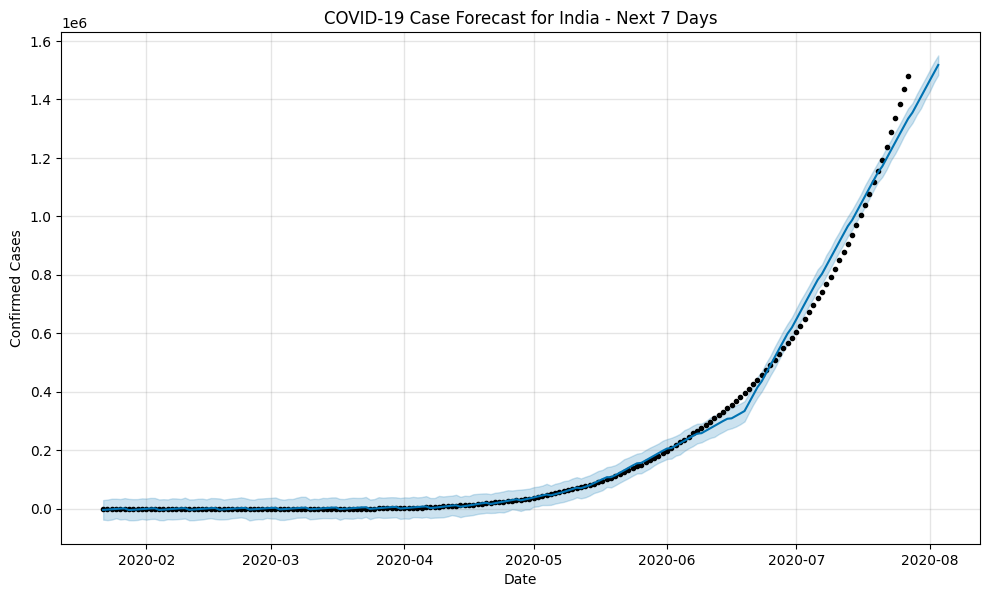

            ds          yhat    yhat_lower    yhat_upper
0   2020-01-22 -4.219421e+03 -3.743596e+04  2.948127e+04
1   2020-01-23 -3.071730e+03 -3.917506e+04  3.118163e+04
2   2020-01-24 -1.796446e+03 -3.725713e+04  3.412681e+04
3   2020-01-25 -7.951022e+02 -3.257460e+04  3.415647e+04
4   2020-01-26  3.463654e+02 -3.709145e+04  3.302505e+04
..         ...           ...           ...           ...
190 2020-07-30  1.409255e+06  1.370049e+06  1.444335e+06
191 2020-07-31  1.436718e+06  1.401344e+06  1.471378e+06
192 2020-08-01  1.463907e+06  1.426688e+06  1.499075e+06
193 2020-08-02  1.491236e+06  1.458208e+06  1.526839e+06
194 2020-08-03  1.517933e+06  1.483627e+06  1.550494e+06

[195 rows x 4 columns]


In [ ]:
# Install the correct package
!pip uninstall fbprophet
!pip install prophet

# Import
from prophet import Prophet
predict_covid_data=covid_data[covid_data['Country'] == country1]

 # Import the Prophet class
country_data_grouped =predict_covid_data.groupby('Date')['Confirmed'].sum().reset_index()

# Prepare data for Prophet
country_data_grouped.rename(columns={'Date': 'ds', 'Confirmed': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet()
model.fit(country_data_grouped)

# Create future dates (next 7 days)
future = model.make_future_dataframe(periods=7)

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title(f'COVID-19 Case Forecast for {country1} - Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

# Display the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

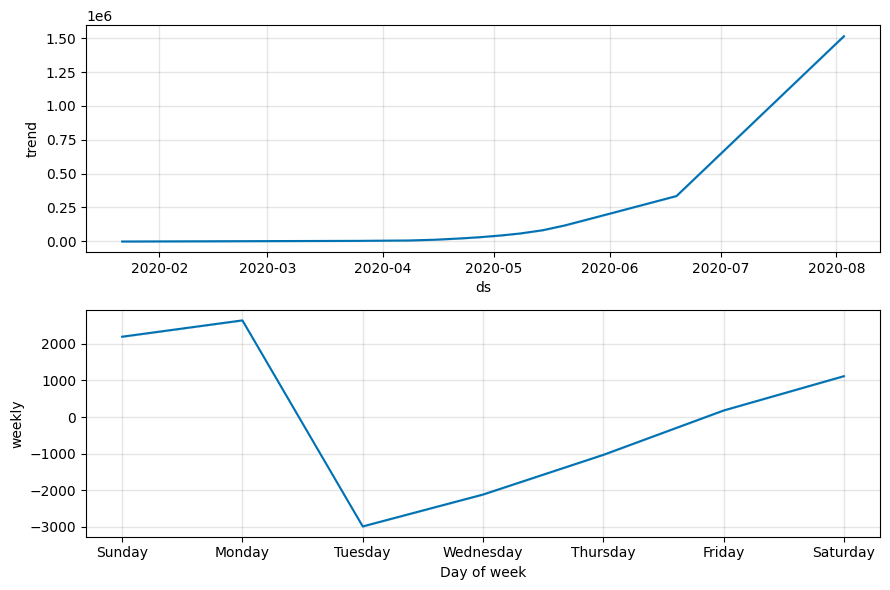

In [ ]:
confirmed_forecast_plot=model.plot_components(forecast)